# Univariate Logistic Regression

In this notebook we will review the main concepts of linear binary classification using an example of logistic regression. We will look at the univariate case - prediction of **heart failure** from a single feature, **Ejection Fraction**.

## Prepare dataset

The code below
* loads all the important libraries
* implements function `accuracyCV` to calculate classification accuracy using cross-validation
* implements function `plotData` to plot the dataset
* creates feature matrix `X` that contains **Ejection Fraction** 
* creates label vector `y` that contains labels **Healthy=0** and **Heart Failure=1**

Run this code.

Dataframe columns:  Index(['EF', 'GLS', 'HF'], dtype='object')
Feature matrix X dimensions:  (120, 1)
Target vector y dimensions:  (120,)


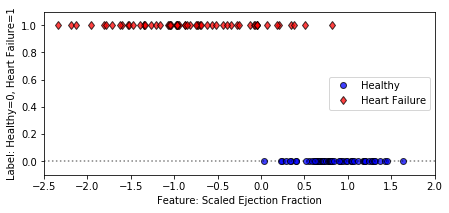

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Calculate cross-validated accuracy
def accuracyCV(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print('Mean cross-validated accuracy: ',round(scores.mean(),2))

# Plot data
def plotData(X,y,adjust_axis = True):
    plt.figure(figsize=(7,3))
    plt.plot(X[y==0], y[y==0], "bo", alpha=0.75, markeredgecolor='k', label = 'Healthy')
    plt.plot(X[y==1], y[y==1], "rd", alpha=0.75, markeredgecolor='k', label = 'Heart Failure')
    plt.plot(np.linspace(-2.5,2,100),np.zeros(100),'k:',alpha=0.5)

    plt.xlabel('Feature: Scaled Ejection Fraction')
    plt.ylabel('Label: Healthy=0, Heart Failure=1')
    plt.legend()
    
    if adjust_axis:
        plt.axis([-2.5,2,-0.1,1.1])

#Load dataset
df = pd.read_csv('datasets/heart_failure_data.csv')
print('Dataframe columns: ', df.keys())
scaler = StandardScaler()
data = df.to_numpy()
X = scaler.fit_transform(data[:,0].reshape(-1,1)) # Ejection Fraction
print('Feature matrix X dimensions: ', X.shape)
y = data[:,2] # Heart Failure
print('Target vector y dimensions: ', y.shape)
plotData(X,y)

## Exercise 1: Logistic regression model

### Fit the model

The code below
* Selects the ```LogisticRegression``` model
* Fits the model using all features and labels
* Calculates the accuracy on whole set and using cross-validation

Run the code.

In [2]:
# Select the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model
model.fit(X,y)

# Calculate the accuracy on the whole set
print('Accuracy = ',round(model.score(X,y),2))

# Calculate cross-validated accuracy 
accuracyCV(model,X,y)

Accuracy =  0.94
Mean cross-validated accuracy:  0.94


### Task 1: Plot decision function

The **decision function** for univariate classifier is defined as $h=w_0+w_1x$. The fitted classifiers in scikit-learn return the values of the decision function using `model.decision_function`.

We will now plot the decision function of the fitted Logistic Regression model. Fist we will generate the feature space `x` for scaled EF, which covers interval [-2.5,2] as visible from the plot above.

Your task is to 
* predict the decision function values `df` on the feature space `x`
* plot the decision function

The code for plotting the data is already there for you. Notices the output values of the decision function and the change of the scale in y-coordinate.

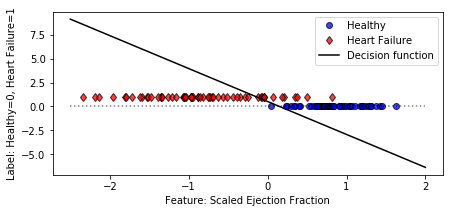

In [3]:
# Generate feature space
x = np.linspace(-2.5,2,100).reshape(-1,1)
# Predict decision function
df = model.decision_function(x)
# Plot data
plotData(X,y,adjust_axis=False)
# Plot decision function
plt.plot(x,df,'k', label = 'Decision function')
plt.legend()

### Task 2: Plot decision boundary

The **decision boundary**  of a linear classifier is defined by the setting the decision function to zero. In univariate case it is $w_0+w_1x=0$.

Your task us to
* Find the intercept $w_0$ and slope $w_1$
* Calculate the decision boundary as $x=\frac{-w_0}{w_1}$. 

*Hint:* Use `model.intercept` and `model.coef_`. Remember that they are numpy arrays, so you need to select the first element

Intercept:  [0.52]
Coefficients:  [[-3.45]]
Decision boundary is  0.15


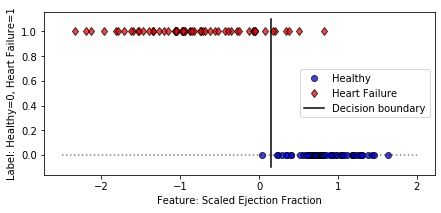

In [4]:
# intercept is a 1D array
print('Intercept: ', np.around(model.intercept_,2))
# coeficients are a 2D array
print('Coefficients: ', np.around(model.coef_,2))

# extract weights
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

# calculate decision boundary - note it is a scalar
decision_boundary = -w0/w1
print('Decision boundary is ', round(decision_boundary,2))

# plot the data
plotData(X,y,adjust_axis=False)

# plot the decision boundary
plt.plot([decision_boundary,decision_boundary],[-0.1,1.1], 'k', label = 'Decision boundary')
_=plt.legend()

### Task 3: Plot probabilitic predictions

In binary logistic regression the confidence in predicted labels can be evaluated as $p(y=1|x)=\sigma(h(x))$ and $p(y=0|x)=1-\sigma(h(x))$. The probabilistic prediction are evaluated using function `model.predict_proba`. 

Your task is to calculate probabilistic prediction `proba` for the whole feature space and plot them. Check the dimensions of `proba`, you will see that the function returns probabilities for both classes. 

Dimesions of proba:  (100, 2)


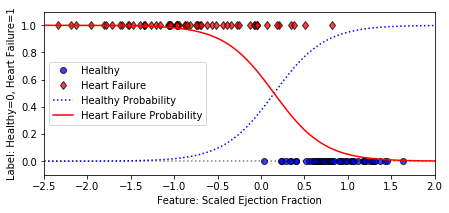

In [5]:
# calculate probabilistic predictions
proba = model.predict_proba(x)
# check the dimension
print('Dimesions of proba: ', proba.shape)

# plot data
plotData(X,y)

# plot probabilistic predictions
plt.plot(x,proba[:,0],'b:', label = 'Healthy Probability')
plt.plot(x,proba[:,1],'r-', label = 'Heart Failure Probability')
plt.legend()

### Task 4: Diagnosis

A patient with suspicion of heart failure has an MRI scan. The ejection fraction is 40%. Decide whether the patient is likely to have a heart failure and calculate confidence in this decision.

**Answer:** The patient is diagnosed with heart failure with relatively high confidence of 82%.

In [6]:
# EF=40%
x_new=40

# convert the feature to a 2D numpy array
# scale it using already fitted scaler
x_new = scaler.transform(np.array(x_new).reshape(-1,1))
print('Scaled EF: ', np.around(x_new,2))

# predict the label
y_new = model.predict(x_new)
print('Predicted label: ', y_new)

# predict confidence
proba_new = model.predict_proba(x_new)
print('Predicted confidence: ', round(proba_new[0,y_new[0].astype(int)],2))

Scaled EF:  [[-0.3]]
Predicted label:  [1.]
Predicted confidence:  0.82
